In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [177]:
serie_temporal = pd.read_csv('CERTEL.csv',index_col='MesReferencia',parse_dates=True, sep=',')
serie_temporal.index.freq='MS'

C:\Users\Max\AppData\Local\Temp\ipykernel_7668\1653805633.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  serie_temporal = pd.read_csv('CERTEL.csv',index_col='MesReferencia',parse_dates=True, sep=',')


In [178]:
trc_total = pd.read_csv('CERTEL_TRC.csv',index_col='MesReferencia',parse_dates=True, sep=',')
trc_total.index.freq='MS'
injetada_total = pd.read_csv('CERTEL_INJETADA.csv',index_col='MesReferencia',parse_dates=True, sep=',')
injetada_total.index.freq='MS'

C:\Users\Max\AppData\Local\Temp\ipykernel_7668\679142768.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trc_total = pd.read_csv('CERTEL_TRC.csv',index_col='MesReferencia',parse_dates=True, sep=',')
C:\Users\Max\AppData\Local\Temp\ipykernel_7668\679142768.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  injetada_total = pd.read_csv('CERTEL_INJETADA.csv',index_col='MesReferencia',parse_dates=True, sep=',')


In [179]:
trc_total.index = pd.to_datetime(trc_total.index, format='%d%b%Y')
trc_total.sort_values(by = 'MesReferencia' , inplace = True)

,Consumo Ativo TUSD
MesReferencia,
2018-01-01,36548836.0
2018-02-01,35336507.0
2018-03-01,34552931.0
2018-04-01,33285934.0
2018-05-01,32151965.0
...,...
2023-08-01,32609752.0
2023-09-01,32454170.0
2023-10-01,32519083.0


In [180]:
injetada_total.index = pd.to_datetime(injetada_total.index, format='%d%b%Y')
injetada_total.sort_values(by = 'MesReferencia' , inplace = True)
injetada_total = 10*injetada_total

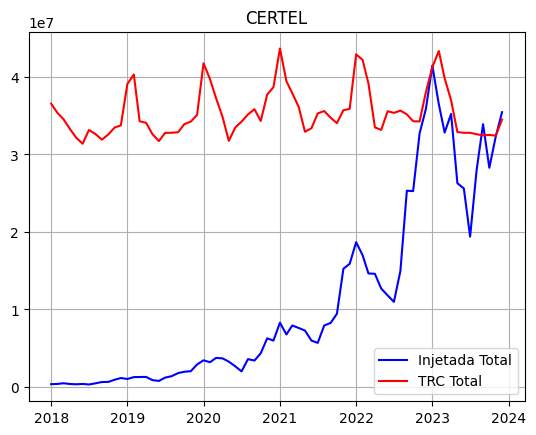

In [181]:
plt.plot(injetada_total, color='blue',label='Injetada Total')
plt.plot(trc_total, color='red', label='TRC Total')
plt.legend(loc='best')
plt.title('CERTEL')
plt.grid()

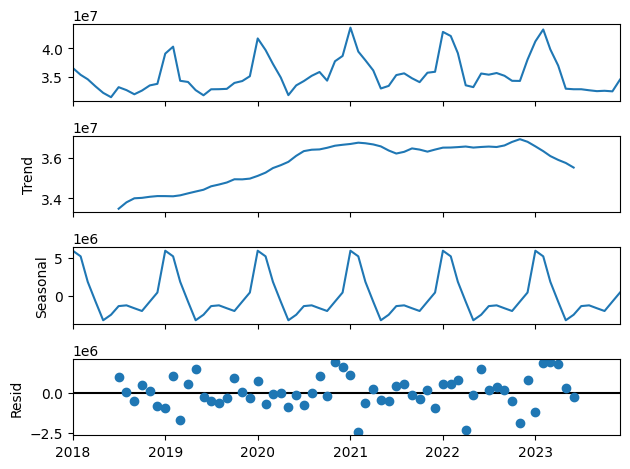

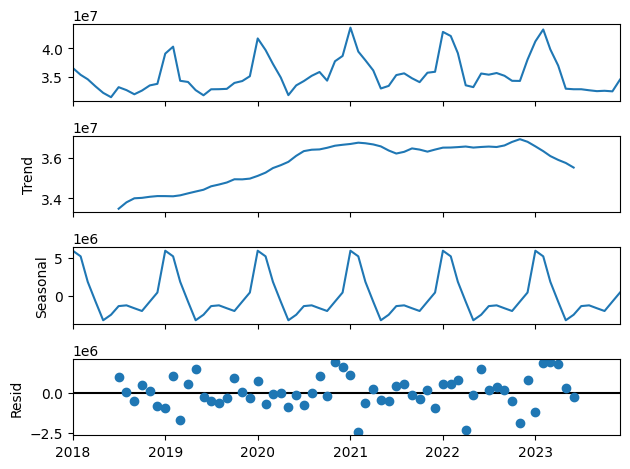

In [182]:
decompose_trc = seasonal_decompose(trc_total)
decompose_trc.plot()

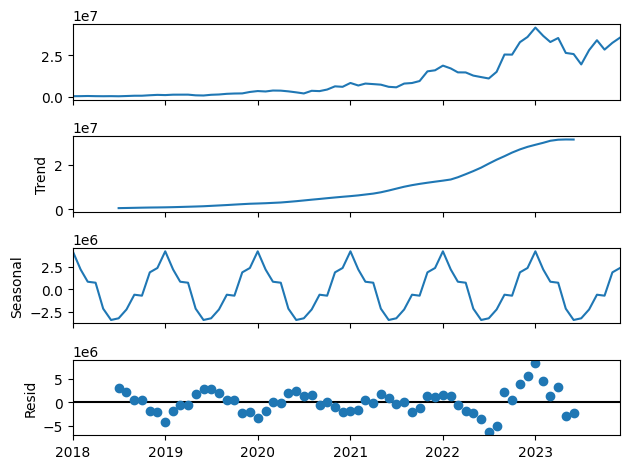

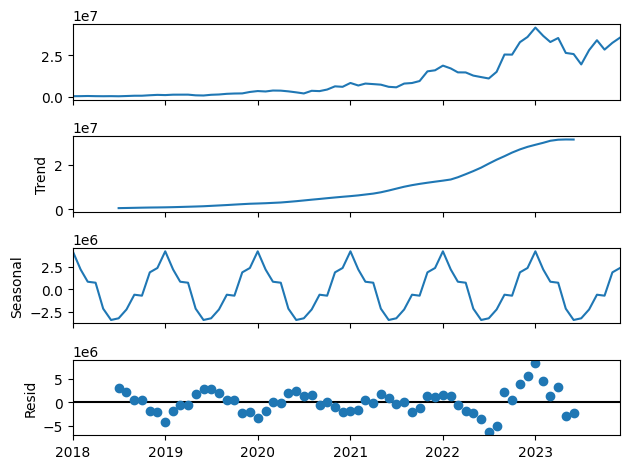

In [183]:
decompose_injetada = seasonal_decompose(injetada_total)
decompose_injetada.plot()

In [184]:
len(serie_temporal)

72

In [188]:
trc_train = pd.DataFrame(trc_total.iloc[:60, 0])
trc_test = pd.DataFrame(trc_total.iloc[60:, 0])
trc_test

,Consumo Ativo TUSD
MesReferencia,
2023-01-01,41249286.0
2023-02-01,43352706.0
2023-03-01,39827960.0
2023-04-01,36971162.0
2023-05-01,32883797.0
2023-06-01,32790629.0
2023-07-01,32790944.0
2023-08-01,32609752.0
2023-09-01,32454170.0


In [186]:
scaler = MinMaxScaler()

In [189]:
scaler.fit(trc_train)
scaled_train = scaler.transform(trc_train)
scaled_test = scaler.transform(trc_test)

In [190]:
scaled_train[:10]

array([[0.42012802],
       [0.32149056],
       [0.25773728],
       [0.15465192],
       [0.06238998],
       [0.        ],
       [0.14408316],
       [0.10179724],
       [0.04213427],
       [0.09511099]])

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 5ms/step - loss: 0.0784
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0248
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0169
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0134
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0128
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0053
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0056
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0047
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0040
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 13/50
144/144 [====

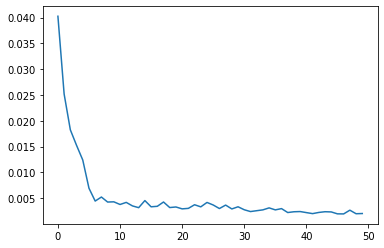

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.6046513]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6046513], dtype=float32),
 array([0.5854211], dtype=float32),
 array([0.7456695], dtype=float32),
 array([0.8121553], dtype=float32),
 array([0.911981], dtype=float32),
 array([0.8914289], dtype=float32),
 array([0.8224216], dtype=float32),
 array([0.7289473], dtype=float32),
 array([0.6303051], dtype=float32),
 array([0.59199744], dtype=float32),
 array([0.54971915], dtype=float32),
 array([0.5722453], dtype=float32)]

In [ ]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,813.303572
1975-02-01,782,809.682804
1975-03-01,892,879.037941
1975-04-01,903,912.407272
1975-05-01,966,954.157072


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

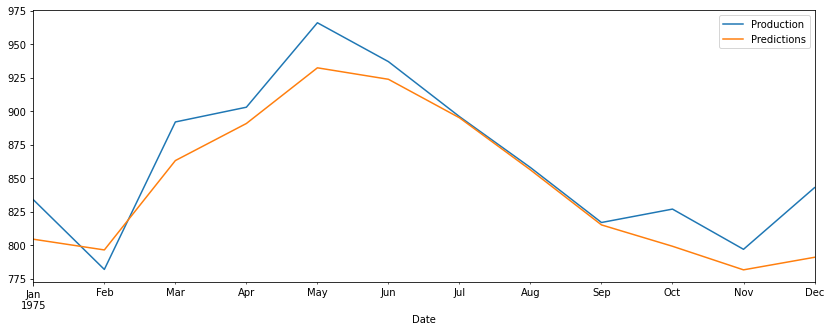

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

24.270639050894633
